In [ ]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# 1. Load DataSet


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DataSets/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin-1')

In [ ]:
# View First few Row of Data
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
# View All Data Details
df.shape    # Here 15433 Rows and 11 Columns Available

(15433, 11)

# 2. Data **Cleaning**

In [ ]:
# Finding Missing Values and fixing

print(df.isnull().sum())
df.dropna()                  # Drop All Missing Values
print(df.isnull().sum())     # Recheck After Drop

City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64
City            117
Year            117
Sport           117
Discipline      117
Event           117
Athlete         117
Gender          117
Country_Code    117
Country         117
Event_gender    117
Medal           117
dtype: int64


In [ ]:
# Satistical and data types

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [ ]:
# Finding Duplicate values and dropping all

df.duplicated().sum()
df.drop_duplicates(inplace =True)    # Drop AllDuplicates
df.duplicated().sum()

np.int64(0)

In [ ]:
# Year Data type convert to integer

df.dropna(inplace=True)
df['Year'] = df['Year'].astype(int)

In [ ]:
# Check Data After CLeaning
df.shape

(15315, 11)

# 3. Exploratory Data Analysis (EDA)

In [ ]:
df.describe(include = 'object')

,City,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
count,15315,15315,15315,15315,15315,15315,15315,15315,15315,15315
unique,9,28,41,293,11337,2,128,127,3,3
top,Beijing,Aquatics,Athletics,hockey,"PHELPS, Michael",Men,USA,United States,M,Bronze
freq,2042,2210,1523,816,16,9387,1992,1992,8816,5258


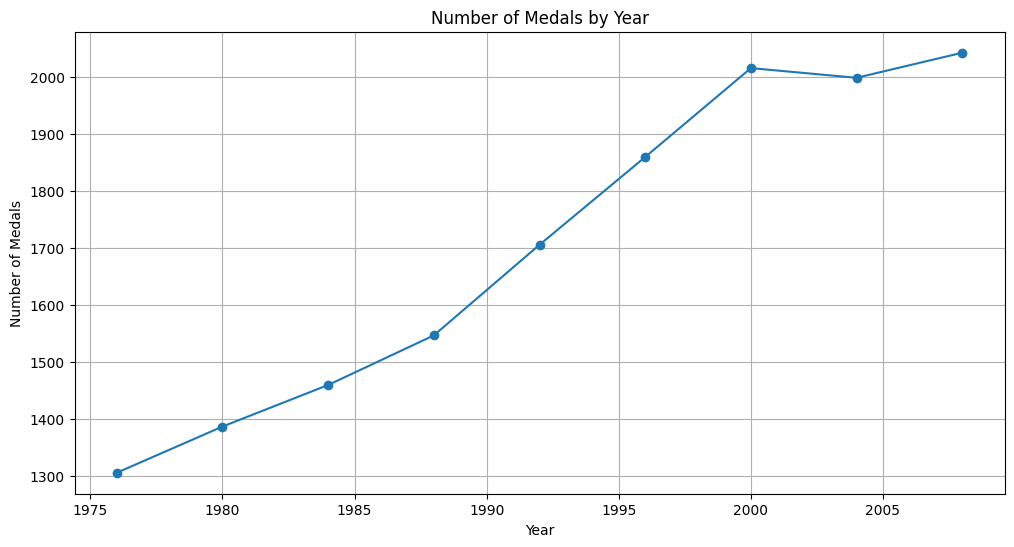

In [ ]:
# Count Medals per year
medals_by_year = df.groupby('Year').size()

# Plot
plt.figure(figsize = (12,6))
medals_by_year.plot(kind = 'line', marker = 'o')
plt.title('Number of Medals by Year')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.grid(True)

plt.show()

Top 5 Countries by Medal Count
 Country
United States    1992
Soviet Union     1021
Australia         798
Germany           691
China             679
Name: count, dtype: int64


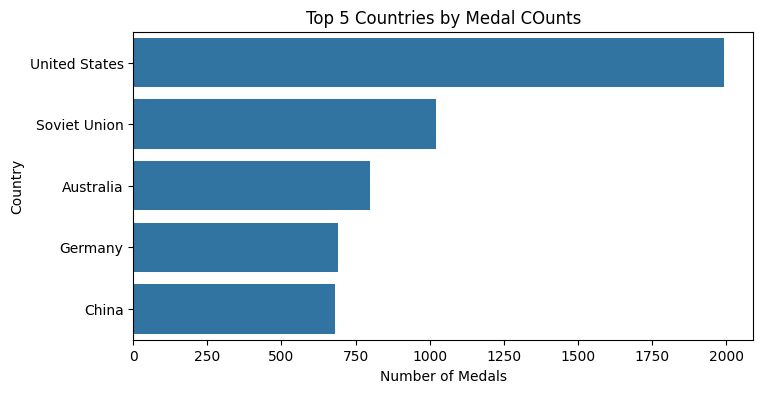

Top 5 Athletes by Medal Cunts
 Athlete
PHELPS, Michael       16
ANDRIANOV, Nikolay    12
TORRES, Dara          12
NEMOV, Alexei         12
FISCHER, Birgit       12
Name: count, dtype: int64


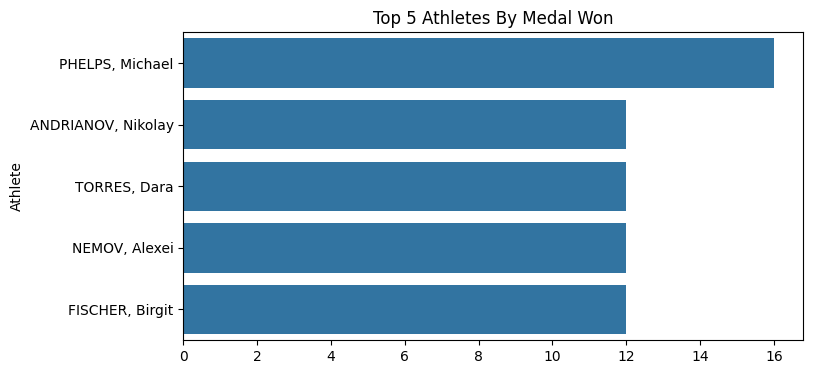

In [ ]:
# Top-Performing Athletes and Countries

# Top 5 Countries by Medal Counts
top_countries = df['Country'].value_counts().head(5)
print("Top 5 Countries by Medal Count\n", top_countries)

plt.figure(figsize= ((8,4)))
sns.barplot(x=top_countries.values, y =top_countries.index)
plt.title('Top 5 Countries by Medal COunts')
plt.xlabel('Number of Medals')
plt.ylabel('Country')

plt.show()
# Top 5 Athletes by Medal Count

top_athlete = df['Athlete'].value_counts().head(5)
print("Top 5 Athletes by Medal Cunts\n", top_athlete)

plt.figure(figsize =(8,4))
sns.barplot(x=top_athlete.values, y =top_athlete.index)
plt.title('Top 5 Athletes By Medal Won')
plt.ylabel('Athlete')

plt.show()

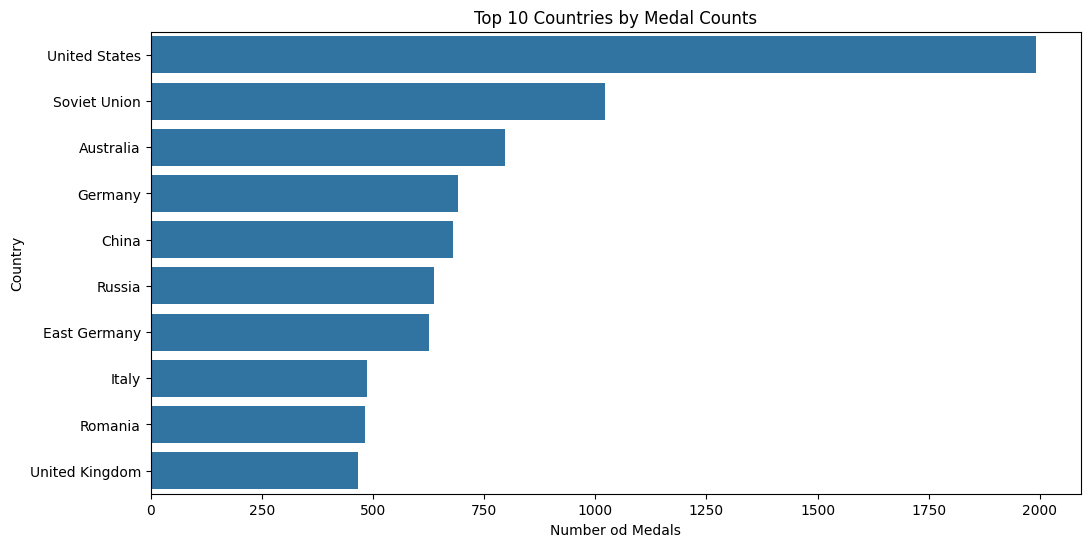

In [ ]:
# Top 10 Countries by Medal Counts
top_10_countries = df['Country'].value_counts().head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)
plt.title('Top 10 Countries by Medal Counts')
plt.xlabel('Number od Medals')
plt.ylabel('Country')

plt.show()

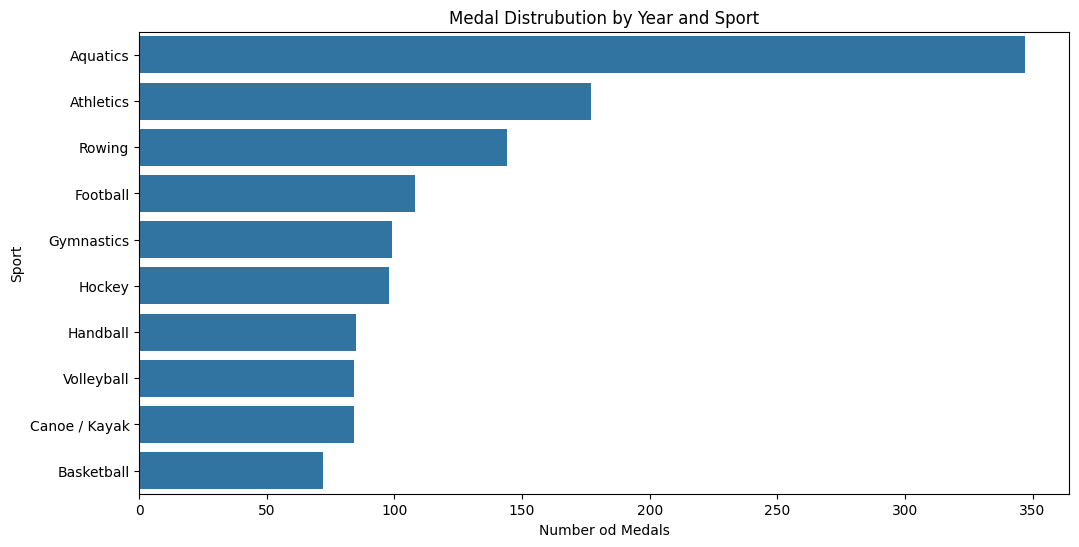

In [ ]:
# Medal Distribution by Year and Sport (e.g., 2008)
# Filter Data for 2008
df_2008 = df[df['Year'] == 2008]

# Medal Count by Sport in 2008
medals_by_sport_2008 = df_2008['Sport'].value_counts().head(10)

# Plot
plt.figure(figsize =(12,6))
sns.barplot(x=medals_by_sport_2008.values, y = medals_by_sport_2008.index)
plt.title('Medal Distrubution by Year and Sport')
plt.xlabel('Number od Medals')
plt.ylabel('Sport')

plt.show()

<Figure size 1800x1200 with 0 Axes>

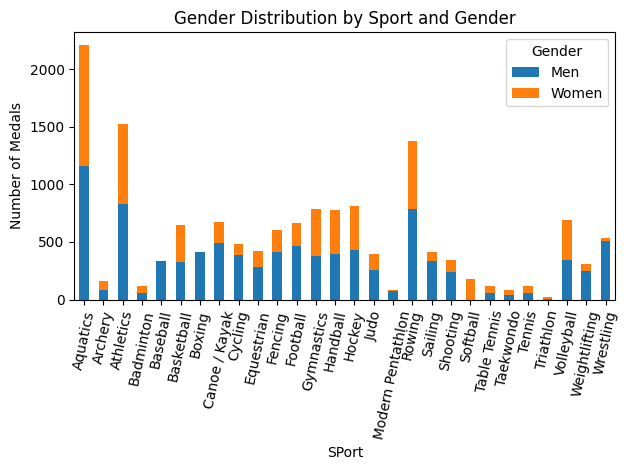

In [ ]:
# Gender Distribution in Sports/Events
# Medal count by sport and gender
medals_by_sport_gender = df.groupby(['Sport', 'Gender']).size().unstack().fillna(0)

# Plot
plt.figure(figsize = (18,12))
medals_by_sport_gender.plot(kind = 'bar', stacked = True)
plt.title('Gender Distribution by Sport and Gender')
plt.xlabel('SPort')
plt.ylabel('Number of Medals')
plt.legend(title = 'Gender')
plt.xticks(rotation = 78)
plt.tight_layout()

plt.show()

# 4. Predictive Analysis

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

We’ll build a simple Random Forest model to predict whether an athlete wins a medal based on features like Country, Sport, Discipline, Event, and Gender.

4.1 Prepare Data for Machine Learning
We need to:

Convert the target variable (Medal) into a binary variable (1 for medal, 0 for no medal, assuming non-medal data exists).
Encode categorical features (e.g., Country, Sport) into numbers.
Since your dataset only contains medal winners, let’s assume we’re predicting the type of medal (Gold, Silver, Bronze) or create a binary target (medal vs. no medal). For simplicity, we’ll predict whether the medal is Gold (1) or not (Silver/Bronze, 0).

In [ ]:
# Create binary target 1 for Gold, 0 for silver and bronze

df['is_Gold']= df['Medal'].apply(lambda x: 1 if x == 'Gold' else 0)

# Select features and target
features = ['Country', 'Sport', 'Discipline', 'Event', 'Gender']
x = df[features]
y = df['is_Gold']

# ENcode categorical features
le = LabelEncoder()
for col in features:
  x[col] = le.fit_transform(x[col])

# Split Data into Training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

We’ll use a Random Forest Classifier, which is beginner-friendly and effective.

In [ ]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7120470127326151

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      2065
           1       0.56      0.55      0.55       998

    accuracy                           0.71      3063
   macro avg       0.67      0.67      0.67      3063
weighted avg       0.71      0.71      0.71      3063



# END